In [320]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [321]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import sklearn.neighbors
import sklearn.metrics
from __future__ import print_function

from lime_time_series import *

In [356]:
# read dataset
train = pd.read_csv('time_series/Trace_TRAIN', header=None)
test = pd.read_csv('time_series/Trace_TEST', header=None)
#train = train[train[0]>2].reset_index().drop(['index'], axis=1)
#test = test[test[0]>2].reset_index().drop(['index'], axis=1)

Y_columns = [0]
Y_train = train[Y_columns]
X_train = train.drop(Y_columns, axis=1)
Y_test = test[Y_columns]
X_test = test.drop(Y_columns, axis=1)

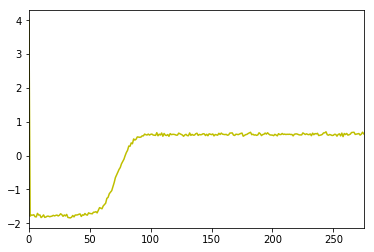

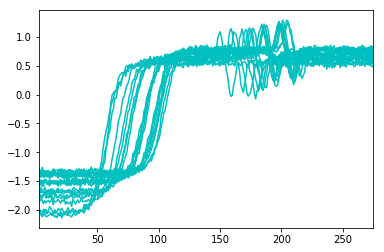

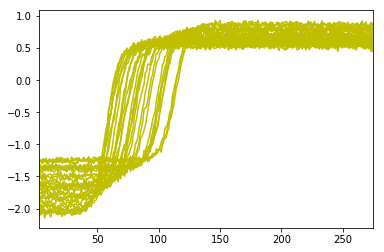

In [358]:
#train[train[0]==1].transpose()[1:].plot(legend=False, color='k')
#plt.show()
#train[train[0]==2].transpose()[1:].plot(legend=False, color='c')
#plt.show()
#for index,row in train[train[0]==3].iterrows():
#    row.plot(legend=False)
#    plt.show()
#for index,row in train[train[0]==4].iterrows():
#    row.plot(legend=False, color='y')
#    plt.show()
train[train[0]==3].transpose()[2:].plot(legend=False, color='c')
plt.show()
train[train[0]==4].transpose()[2:].plot(legend=False, color='y')
plt.show()
#test[test[0]==1].transpose()[1:].plot(legend=False, color='y')
#plt.show()

In [359]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [360]:
def DTWDistance_windowed(s1, s2):
    DTW={}

    w = max(10, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [393]:
kNN = sklearn.neighbors.KNeighborsClassifier(metric=DTWDistance_windowed)
kNN.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function DTWDistance_windowed at 0x7efbd8c21488>,
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [329]:
pred = kNN.predict(X_test)

In [330]:
pred

array([3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3,
       4])

In [331]:
sklearn.metrics.accuracy_score(Y_test.values.ravel(), pred)

0.8936170212765957

In [389]:
clf = sklearn.svm.SVC()
clf.fit(X_train, Y_train.values.ravel())  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [391]:
res = clf.predict(X_test)

In [392]:
sklearn.metrics.accuracy_score(Y_test.values.ravel(), res)

0.51000000000000001

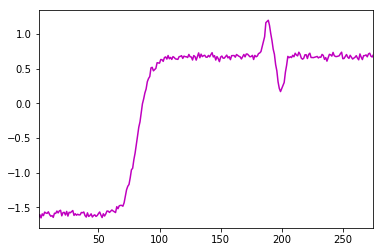

Series id: 10
Probabilities:  [[ 0.  0.  1.  0.]]
True class: 3


In [397]:
plt.clf()
test_series_index = 10
instance_to_predict = X_test.iloc[test_series_index]
instance_to_predict.plot(legend=False, color='m')
#plt.savefig('trace_explain_lime_{}.png'.format(test_series_index),dpi=400)
plt.show()
print('Series id: %d' % test_series_index)
print('Probabilities: ', kNN.predict_proba([X_test.iloc[test_series_index]]))
print('True class: %s' % Y_test.iloc[test_series_index, 0])

In [399]:
explainer = LimeTimeSeriesExplainer()
num_ranges = 25
num_samples = 10 * num_ranges

FEATURE 0:


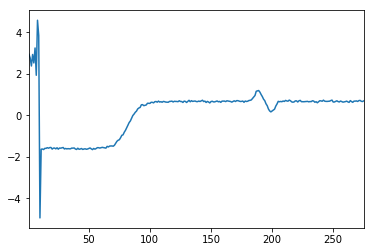

FEATURE 1:


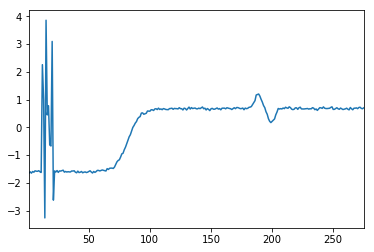

FEATURE 2:


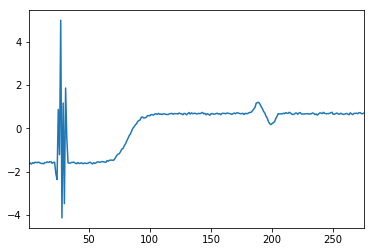

FEATURE 3:


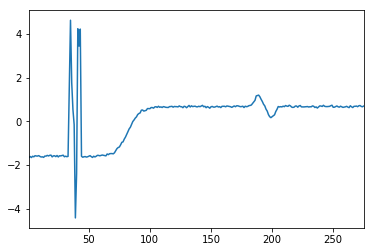

FEATURE 4:


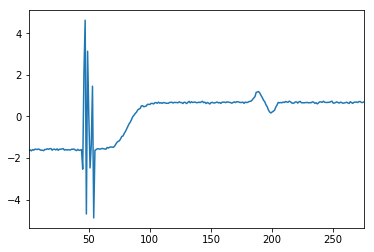

FEATURE 5:


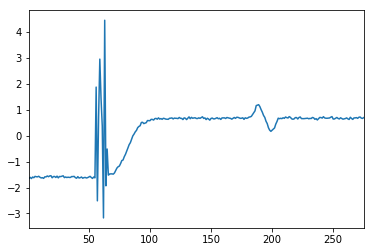

FEATURE 6:


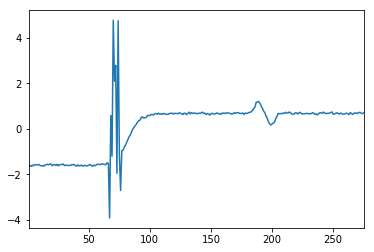

FEATURE 7:


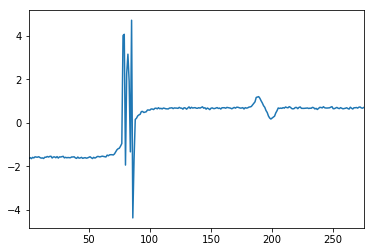

FEATURE 8:


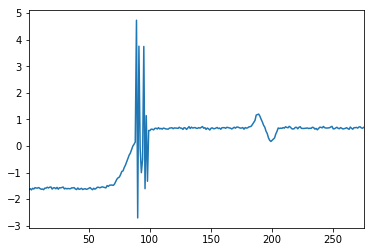

FEATURE 9:


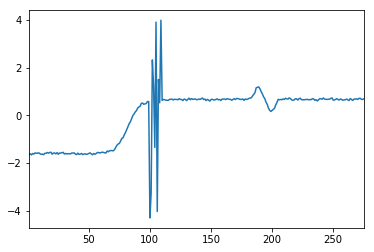

FEATURE 10:


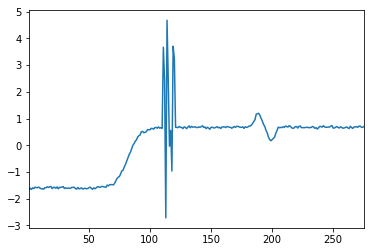

FEATURE 11:


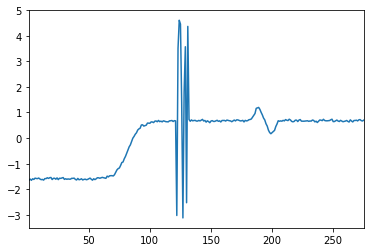

FEATURE 12:


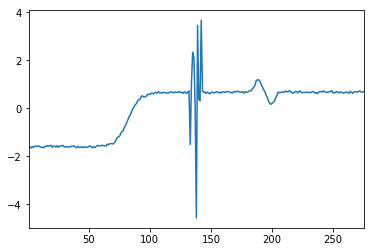

FEATURE 13:


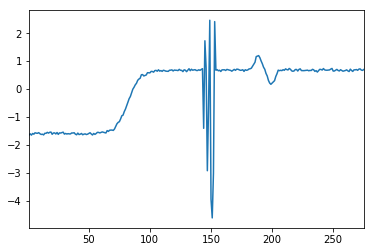

FEATURE 14:


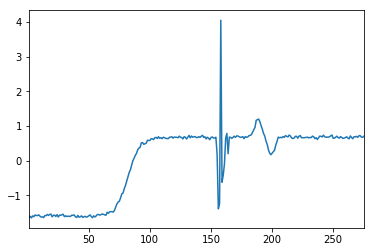

FEATURE 15:


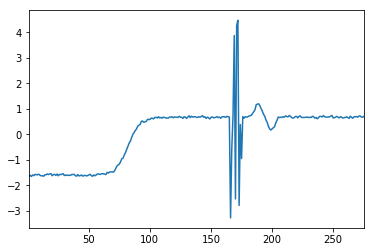

FEATURE 16:


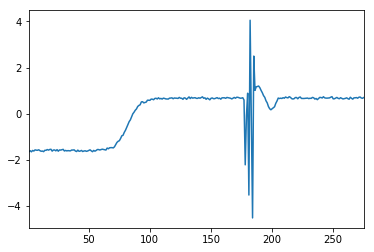

FEATURE 17:


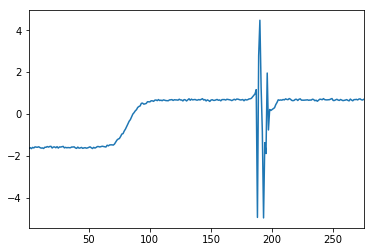

FEATURE 18:


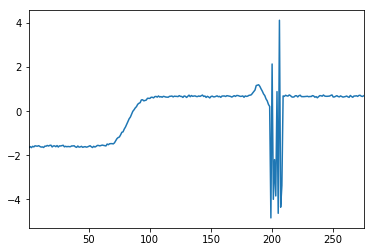

FEATURE 19:


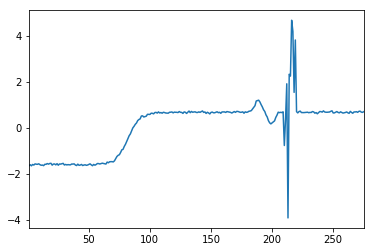

FEATURE 20:


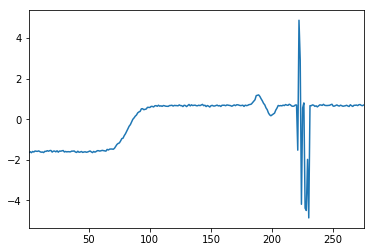

FEATURE 21:


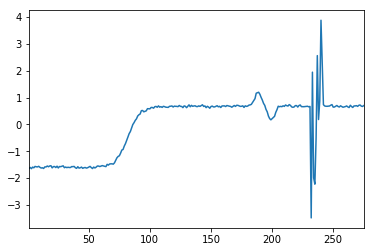

FEATURE 22:


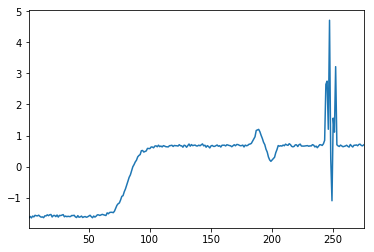

FEATURE 23:


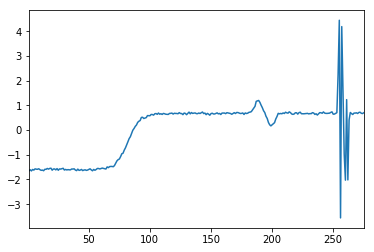

FEATURE 24:


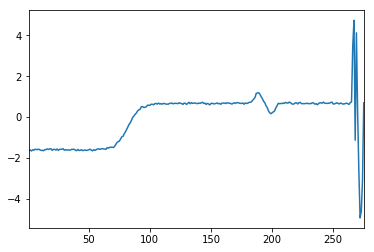

[ 1 18 10 20  5 18 14 18 21 20 11 10 24 19  9 14 12 16 14 10 10  7 12  1 12
 23 21 21 14 14 14  8 16 22 14  2 19 10  1 21 23 22 24 11  6  2  6 11 24  8
 22  7  1  6  1 14 20  5 12  7 24 21 16 20 14 23 18 13  9 15 24 20  8 17 17
 15 13  5  2  1 24  9 15 16 10 22  9 11 14  4  2 14  7  9 23 20  8 23 15  6
  7  7 14 11 12 16 15 24 22 11 19  3  5 15  6  5  5  9 12 19 20  1  6 15  8
 11  7 10 19 12  9  9 20 15 20 10  2  7 17  8  1 16 15  2 17 19 13 12 18 20
 15  4 17  6  1 12 16 24 21 18  6 20  6 17  6  9 15 18 16  2 17 21 12 10 20
 21 23 19 24 20 11  5  7 19  8 22  2  3 13  4 22 10  3 21 20 20  4 15 22 23
 14  2 22  2 22 22 22 14 18  3 15  1 20 22 18 23  6  3 16 15  6 12 10  5  6
  3 20 21 16 13 18 17 13 20  5  2 20 20 11 18  3  3 16 12  3 23 23  6 19]


In [ ]:
exp = explainer.explain_instance(X_test.iloc[[test_series_index]], kNN.predict_proba, top_labels=2, num_features=num_ranges, num_ranges=num_ranges, num_samples=num_samples)

In [385]:
features = exp.as_map()[3]
features.sort(key=lambda x: x[0])
print(features)

[(0, 0.17609895235940612), (1, 0.19005787196349777), (2, -0.11208003092366384), (3, -0.0022788235913307441), (4, 0.0093855231357645452), (5, 0.062472657155732012), (6, 0.34168485398699022), (7, 0.31495476581521409), (8, 0.10741313611872165), (9, -0.00069975858562948499)]


In [386]:
def visualize_range(time_series, num_ranges, feature_ranking):
        #tmp = time_series.copy().iloc[1]
        plt.clf()
        tmp = time_series.copy()
        
        y = tmp.values
        x = tmp.index.values
        
        
        color_list = []
        linewidth_list = []
        
        for feature in feature_ranking:
            linewidth_list.extend([feature[1]*5]* math.floor(len(x)/num_ranges))
            if feature[1] < 0:
                color_list.append('r')
            else:
                color_list.append('g')

        cmap = ListedColormap(color_list)
        
        boundary_list = [1]
        
        for feature in feature_ranking:
            boundary_list.append(1 + (feature[0]+1) *  math.floor(len(x)/num_ranges))
            
        norm = BoundaryNorm(boundary_list, cmap.N)

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        lc = LineCollection(segments, cmap=cmap, norm=norm, linewidths=linewidth_list)
        lc.set_array(x)
        
        fig1 = plt.figure()
        plt.gca().add_collection(lc)
        plt.xlim(x.min(), x.max())
        plt.ylim(y.min()-1, y.max()+1)
          
        plt.savefig('fiv_traceclass{}_{}_{}_{}.png'.format(test_series_index, num_ranges, Y_test.iloc[test_series_index, 0], num_samples), dpi=400)

In [387]:
visualize_range(instance_to_predict, num_ranges, features)